### recording and saving a voice

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa
import soundcard as sc
import soundfile as sf

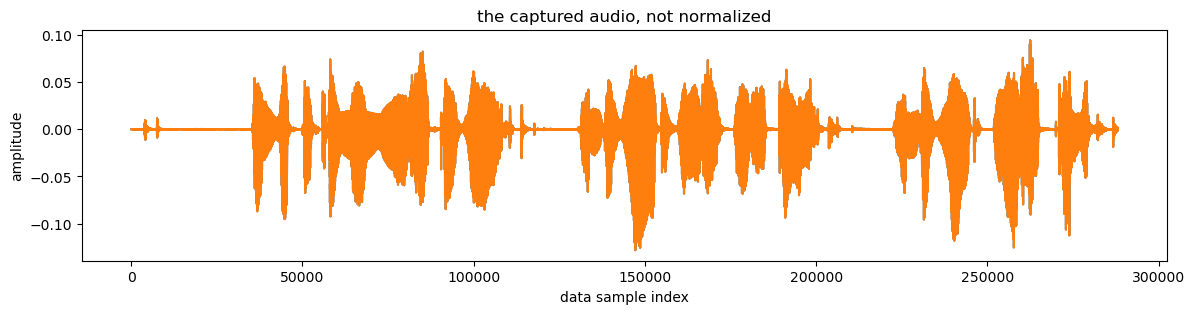

In [3]:
default_speaker = sc.default_speaker() # get the default speaker
default_mic = sc.default_microphone() # get the default microphone
sr = 48000 # set sample rate and duration of recording
num_second = 6.2
num_frames = sr * int(num_second)
audiodata = default_mic.record(samplerate=sr, numframes=num_frames)
# Read: In the beginning was the Word, and the Word was with God, and the Word was God.

sf.write('John_1_1.wav', audiodata, sr, subtype='PCM_24') # Write out audio as 24bit PCM WAV

plt.figure(figsize=(14, 3))
plt.plot(audiodata)
plt.title("the captured audio, not normalized") 
plt.xlabel("data sample index") 
plt.ylabel("amplitude") 
plt.show()

* or ask user to specify sample rate and duration of recording
* sr = int(input('enter desired sample rate (samples per second: '))
* num_second = int(input('enter number of second to record: '))

### read back the saved file and verify

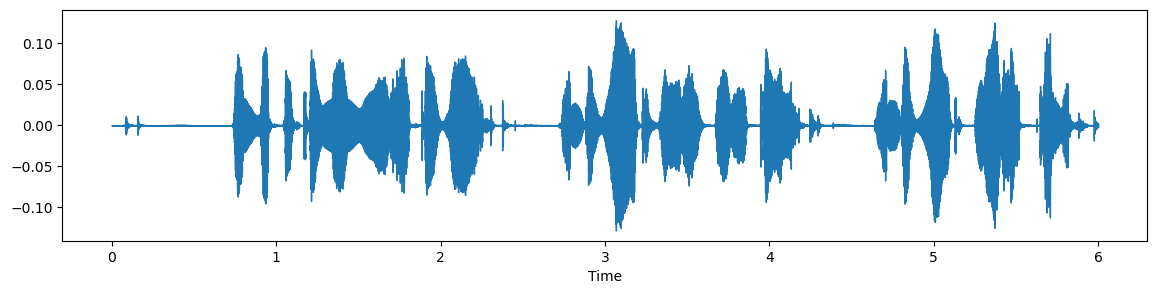

In [4]:
my_voice = "John_1_1.wav" # Ying's voice
y, y_sr = librosa.load(my_voice, sr=None, mono=False)
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 3))
librosa.display.waveshow(y, sr=y_sr)

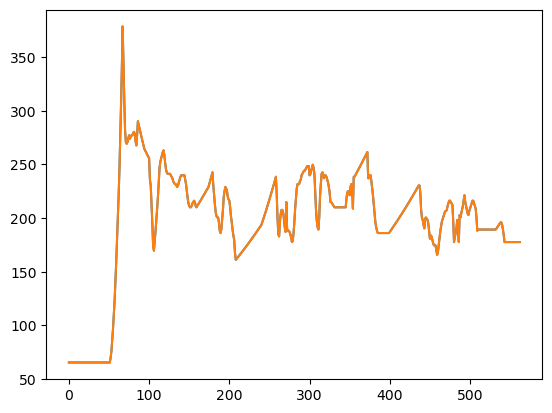

In [5]:
f0, voiced_flag, voiced_probs = librosa.pyin(y, sr=y_sr, 
        fmin=librosa.note_to_hz('C2'), 
        fmax=librosa.note_to_hz('C8'), fill_na=None)
plt.plot(f0[0,])
plt.plot(f0[1,])


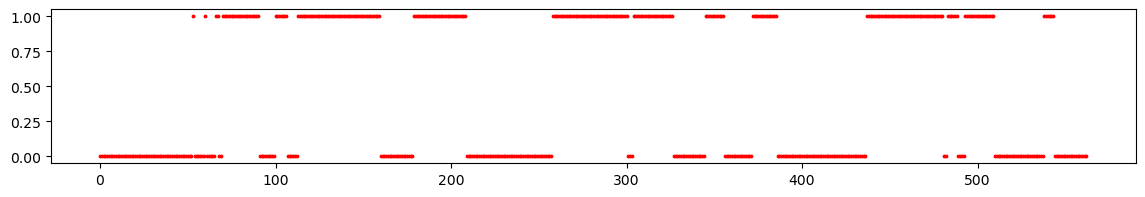

In [6]:
plt.figure(figsize=(14, 2))
plt.scatter(range(voiced_flag[0,].shape[0]),voiced_flag[0,]*1, s=3,color = "r")

In [7]:
# compare what was recorded and what was saved and read back
print('Percentage of difference: ', sum((np.abs(y[1,] - audiodata.T[1,])))/sum(np.abs(y[1,])))
np.array_equal(y,audiodata.T)

Percentage of difference:  5.9869079759654025e-06


False